# Exploring the MovieLens 1M Dataset

#### Based on an example from *Python for Data Analysis (Wes McKinney)*

This dataset contains 1 million ratings collected from 6,000 users on 4,000 movies, and it is organized into three tables:


*   Ratings
*   Users
*   Movie information

Each table is available as a separate file, each containing a series of rows where columns are separated by two colons (*::*).


[Download the original dataset here](http://files.grouplens.org/datasets/movielens/ml-1m.zip)

To make things easier, we have merged these datasets and separated the genres for you. To download the modified dataset that you can use to complete the assignment, see the **#assignments** slack channel.

## **Code**

Let's begin by importing pandas. It is conventional to use *pd* to denote pandas

In [525]:
import pandas as pd

Next we will import our dataset

In [526]:
data = pd.read_csv('movie_lens_genre_separated.tsv', sep='\t')

In [527]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Children's


In this form, aggregating the ratings grouped by one or more user or movie characteristics is straightforward once you build some familiarity with pandas. To get mean movie ratings for each film grouped by gender, we can use the pivot_table method:


In [528]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [529]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


If we wish to only look at movies that received more than a certain number of ratings, we can group them as follows (here using 250 ratings):

In [530]:
ratings_by_title = data.groupby('title').size()

In [531]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            74
'Night Mother (1986)              70
'Til There Was You (1997)        104
'burbs, The (1989)               303
...And Justice for All (1979)    398
dtype: int64

Let's now grab the titles of movies that were rated more than 250 times:

In [532]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [533]:
active_titles[:5]

Index([''burbs, The (1989)', '...And Justice for All (1979)',
       '10 Things I Hate About You (1999)', '101 Dalmatians (1961)',
       '101 Dalmatians (1996)'],
      dtype='object', name='title')

The index of titles receiving at least 250 ratings can then be used to select rows from mean_ratings above:


In [534]:
mean_ratings = mean_ratings.loc[active_titles]

In [535]:
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


To see the top films among female viewers, we can sort by the F column in descending order:

In [536]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [537]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Grand Illusion (Grande illusion, La) (1937)",4.560976,4.266129
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611


Likewise, for males:

In [538]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [539]:
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
Paths of Glory (1957),4.392857,4.485149
"Wrong Trousers, The (1993)",4.588235,4.478261


Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to *mean_ratings* containing the difference in means, then sort by that:

In [540]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by 'diff' gives us the movies with the greatest rating difference and which were preferred by women:

In [541]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [542]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Cutthroat Island (1995),3.200000,2.341270,-0.858730
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Home Alone 3 (1997),2.486486,1.683761,-0.802726
That Darn Cat! (1997),3.156250,2.435484,-0.720766
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Dracula: Dead and Loving It (1995),2.892857,2.250000,-0.642857
"Pagemaster, The (1994)",3.146341,2.510638,-0.635703
Grease (1978),3.975265,3.367041,-0.608224
Herbie Goes Bananas (1980),2.965517,2.373333,-0.592184


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate highly:


In [543]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
Lifeforce (1985),2.250000,2.994152,0.744152
Marked for Death (1990),2.100000,2.837607,0.737607
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
No Escape (1994),2.300000,2.994048,0.694048
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985


### Better formating the occupations and age groups

In [544]:
# More info on the dataset can be found here: http://files.grouplens.org/datasets/movielens/ml-1m-README.txt

occupation_dict = { 
    0: "not specified", 
    1: "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}

age_dict = {
    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}

In [545]:
data['age'] = [age_dict[x] for x in data['age']]
data['occupation'] = [occupation_dict[x] for x in data['occupation']]

In [546]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Children's


# Assignment 1 - Isidora Conic

## Everything below this point are answers to the assignment questions.

**Question 1:** *An aggregate (i.e. average) of the movie ratings for each particular genre.*

In [547]:
#Getting the aggregate movie ratings for each genre 
genre_means = data.groupby("genres")["rating"].mean()
genre_means

genres
Action         3.491185
Adventure      3.477257
Animation      3.684895
Children's     3.422087
Comedy         3.522107
Crime          3.708679
Documentary    3.933123
Drama          3.766332
Fantasy        3.447371
Film-Noir      4.075188
Horror         3.215013
Musical        3.665519
Mystery        3.668102
Romance        3.607465
Sci-Fi         3.466521
Thriller       3.570466
War            3.893327
Western        3.637770
Name: rating, dtype: float64

**Question 2:** *The top 5 highest ranked genres by occupation.*

In [548]:
import numpy as np

In [549]:
#make pivot table 
genre_rating_by_occ = data.pivot_table('rating', index='occupation', columns='genres', aggfunc='mean')

In [550]:
#Get list of all occupations
occupations = data['occupation'].unique()

In [551]:
#Create empty dataframe to insert columns into
top_ranked_by_occ = pd.DataFrame(index = ['1st', '2nd', '3rd', '4th', '5th'])

In [552]:
#Adding top 5 movies for each occupation to the dataframe
#Iterating through the list of occupations
i = 0
for occupation in occupations:
    top_movies = genre_index_all.loc[occupation].sort_values(ascending=False) #Get all avg movie rating for an occupation and sort in descending order
    top_movies = top_movies.reset_index(level=['genres']) #Reset index to make the genres a column
    top_movies = top_movies['genres'] #isolate the genres column (we don't need the ratings anymore, only used to sort)
    top_movies = top_movies.iloc[:5] #get top 5 movies
    top_movies_list = top_movies.tolist() #turn the series into a list in order to use insert 
    top_ranked_by_occ.insert(i, occupation, top_movies_list) #insert values into column and name the column by occupation
    i += 1
    
top_ranked_by_occ

,not specified,college/grad student,lawyer,writer,programmer,technician/engineer,K-12 student,self-employed,executive/managerial,academic/educator,...,farmer,artist,homemaker,unemployed,tradesman/craftsman,scientist,retired,customer service,sales/marketing,doctor/health care
1st,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,...,Documentary,Film-Noir,War,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Documentary
2nd,Documentary,Documentary,Documentary,Documentary,War,Documentary,War,Documentary,Documentary,Documentary,...,Film-Noir,Documentary,Musical,Documentary,War,Documentary,War,Documentary,Documentary,Film-Noir
3rd,War,War,War,War,Documentary,War,Drama,War,War,War,...,War,War,Documentary,War,Western,War,Documentary,Animation,War,War
4th,Drama,Drama,Drama,Animation,Drama,Drama,Crime,Drama,Drama,Drama,...,Western,Drama,Animation,Crime,Animation,Animation,Drama,War,Drama,Drama
5th,Animation,Crime,Mystery,Musical,Western,Animation,Mystery,Crime,Crime,Musical,...,Drama,Mystery,Drama,Drama,Drama,Drama,Mystery,Drama,Animation,Crime


**Question 3:** *The most popular (with the most ratings) movie by age group.*

In [553]:
#make a pivot table that shows the number of ratings for each movie by age group
rating_by_age = data.pivot_table('rating', index='age', columns='title', aggfunc='count')

In [554]:
#Get list of all age groups 
ages = data['age'].unique()

In [555]:
#Create empty dataframe
fav_movies_by_age = pd.DataFrame(columns = ['age', 'most popular title'])

In [556]:
#for each age, find the movie title with the most ratings using loc
for age_group in ages:
    age_ratings = rating_by_age.loc[age_group]
    age_max = age_ratings.idxmax()
    fav_movies_by_age = fav_movies_by_age.append({'age':age_group, 'most popular title':age_max}, ignore_index=True)
    
fav_movies_by_age

,age,most popular title
0,25-34,Star Wars: Episode V - The Empire Strikes Back...
1,18-24,Star Wars: Episode VI - Return of the Jedi (1983)
2,35-44,Star Wars: Episode V - The Empire Strikes Back...
3,Under 18,Star Wars: Episode VI - Return of the Jedi (1983)
4,56+,Star Wars: Episode V - The Empire Strikes Back...
5,50-55,Star Wars: Episode V - The Empire Strikes Back...
6,45-49,Star Wars: Episode V - The Empire Strikes Back...


**Question 4:** *A breakdown of a movie’s ratings by occupation, using any movie of your choice.*

In [557]:
#Per prof's instructions: Each row is a movie title, each column an occupation, and each value an aggregate of the 
#ratings for that movie given by users of each particular occupation
#I chose to look at 'Titanic'
movie_breakdown = data.pivot_table('rating', index='title', columns='occupation', aggfunc='mean')
titanic_info = movie_breakdown.loc['Titanic (1997)']
titanic_info

occupation
K-12 student            3.482143
academic/educator       3.503497
artist                  3.388060
clerical/admin          3.822222
college/grad student    3.390756
customer service        3.777778
doctor/health care      3.819672
executive/managerial    3.640000
farmer                  4.666667
homemaker               4.107143
lawyer                  3.461538
not specified           3.614525
programmer              3.722222
retired                 3.750000
sales/marketing         3.753247
scientist               3.807692
self-employed           3.602941
technician/engineer     3.765217
tradesman/craftsman     3.263158
unemployed              3.000000
writer                  3.183099
Name: Titanic (1997), dtype: float64

**Question 5:** *A function that given a user id, returns: (1) this user’s age and occupation, (2) the average rating given by this user, and (3) his highest and lowest rated movie(s).*

In [558]:
def user_data(user_id):
    #Getting all the person's information
    user_info = data.loc[data['user_id']==user_id]
    
    #Check if this user actually exists (if they don't, the dataframe will be empty)
    if(user_info.empty):
        return None;
    
    #Getting the user's age
    age = user_info.at[0, 'age']
    
    #Getting the user's occupation
    occupation = user_info.at[0, 'occupation']
    
    #Getting the user's mean (average) rating
    mean_rating = user_info['rating'].mean()
    
    #Getting the min value rating that the person gave
    min_rating = user_info['rating'].min()
    
    #Getting the max value rating that the person gave
    max_rating = user_info['rating'].max()
    
    #Getting all movie titles and getting their avg rating
    all_user_titles = user_info.groupby('title')['rating'].mean()
    
    #Getting all titles with a rating equal to min value (in a list, to add to dict)
    min_titles = all_user_titles[all_user_titles == min_rating]
    min_titles_list = min_titles.index.values.tolist()
    
    #Getting all titles with a rating equal to max value (in a list, to add to dict)
    max_titles = all_user_titles[all_user_titles == max_rating]
    max_titles_list = max_titles.index.values.tolist()
    
    #putting all the values into the dictionary to return
    compiled_user_info = dict();
    compiled_user_info['age'] = age
    compiled_user_info['occupation'] = occupation
    compiled_user_info['average rating'] = mean_rating
    compiled_user_info['lowest rated movie(s)'] = min_titles_list
    compiled_user_info['highest rated movie(s)'] = max_titles_list
    
    #return the dictionary
    return compiled_user_info

**NOTE:** Below is the same code/logic from my function, but separated out so that you can call each one and it will just print the values that the function returns in the dictionary. Make sure to enter the user_id in the next cell. Currently it is user_id = 2917 as a placeholder.

In [559]:
#Getting all the person's information
user_info = data.loc[data['user_id']==2917]

In [560]:
#Getting the user's age
age = user_info.at[0, 'age']
print('user age range: ' + age)

user age range: 25-34


In [561]:
#Getting the user's occupation
occupation = user_info.at[0, 'occupation']
print('user occupation: ' + occupation)

user occupation: not specified


In [562]:
#Getting the user's mean (average) rating
mean_rating = user_info['rating'].mean()

In [563]:
#Getting the min value rating that the person gave
min_rating = user_info['rating'].min()
print('user min rating: ' + repr(min_rating))

user min rating: 1


In [564]:
#Getting the max value rating that the person gave
max_rating = user_info['rating'].max()
print('user max rating: ' + repr(max_rating))

user max rating: 5


In [565]:
#Getting all movie titles and getting their avg rating
all_user_titles = user_info.groupby('title')['rating'].mean()

In [566]:
#Getting all titles with a rating equal to min value (in a list, to return)
min_titles = all_user_titles[all_user_titles == min_rating]
min_titles_list = min_titles.index.values.tolist()
print('list of lowest rated titles: ' + repr(min_titles_list))

list of lowest rated titles: ['Arachnophobia (1990)', 'Entrapment (1999)']


In [567]:
#Getting all titles with a rating equal to max value (in a list, to return)
max_titles = all_user_titles[all_user_titles == max_rating]
max_titles_list = max_titles.index.values.tolist()
print('list of highest rated titles: ' + repr(max_titles_list))

list of highest rated titles: ['Annie Hall (1977)', 'Blade Runner (1982)', 'Citizen Kane (1941)', 'City Lights (1931)', 'Crumb (1994)', 'Fandango (1985)', 'Fargo (1996)', 'Hard-Boiled (Lashou shentan) (1992)', 'Killer, The (Die xue shuang xiong) (1989)', 'North by Northwest (1959)', 'Paradise Lost: The Child Murders at Robin Hood Hills (1996)', 'Pulp Fiction (1994)', 'Raging Bull (1980)', 'Raiders of the Lost Ark (1981)', 'Rear Window (1954)', 'Strangers on a Train (1951)', 'Vertigo (1958)']


**Question 6:** *Some other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.*

I wanted to look at how popular (with the most ratings) every genre of movie is across age and gender. The best way I thought to display this data would be in a stacked bar graph, where each bar represents an age and gender (i.e. 18-24 yr old women) and the different colours in the bar represent the proportion of genres. We could then also see, from the plot as a whole, which group watched the most movies (i.e. most ratings).

In [568]:
import matplotlib.pyplot as plt

In [569]:
#Get colormap for the plot
cmap = plt.get_cmap('tab20')

In [570]:
#Make the pivot table with all info needed
genres_by_gender = data.pivot_table('rating', index=['gender', 'age'], columns='genres', aggfunc='count')

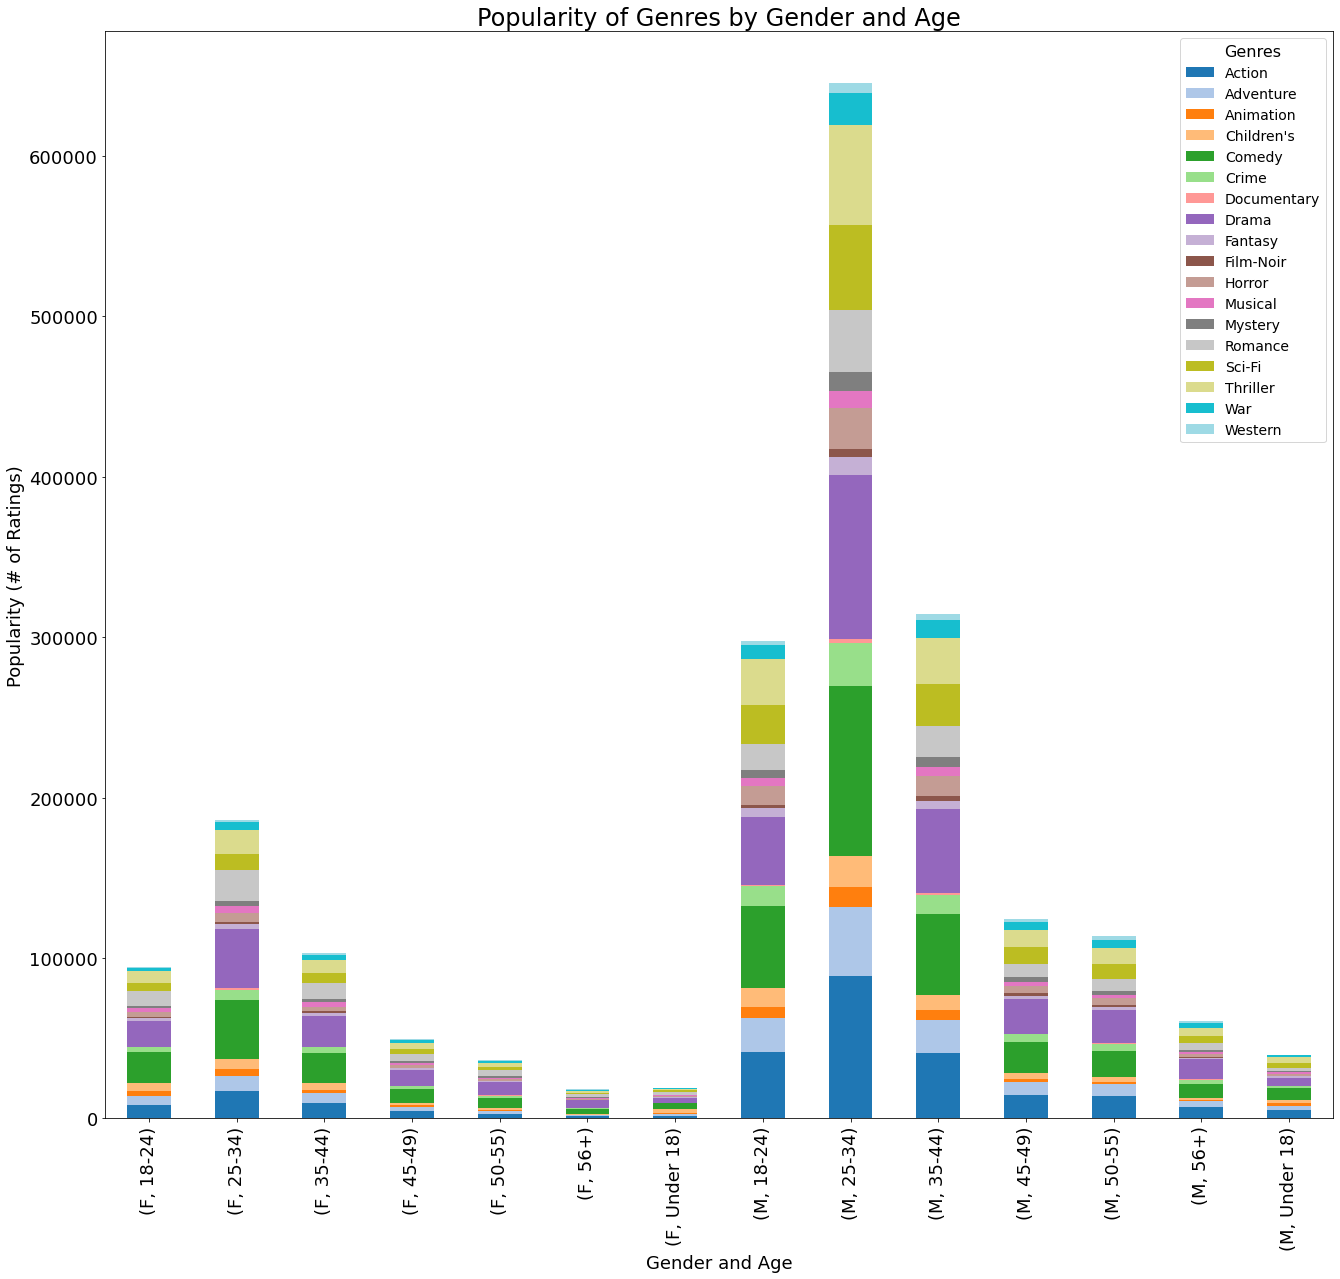

In [571]:
#Creating the plot to show data above
graph = genres_by_gender.plot(kind='bar', stacked=True, figsize=(22,20), fontsize=18, colormap="tab20")
plt.xlabel('Gender and Age', fontsize = 18)
plt.ylabel('Popularity (# of Ratings)', fontsize = 18)
plt.title('Popularity of Genres by Gender and Age', fontsize = 24)
legend = graph.legend(title='Genres', loc=1, fontsize=14)
legend.get_title().set_fontsize(16)

From the above plot, we can observe a couple key things:
1. We can see that men, aged 25-34 watch the most movies (they had the most ratings overall), while women, aged 56+ watch the least amount of movies (had the least ratings overall). 
2. For any of the age groups, we can see what the most popular genres are. For example, in women, aged 25-34, the most popular genres are Drama and Comedy. 
3. Similarly, we can see what the least popular genres are for different age groups and genders. For example, it seems like men, aged 18-24 watch very little Western films and Film-Noir films.